# Evolution des temperatures à Dijon

Notebook exploratoire des temperatures moyennes à Dijon.

**Source des données** : Berkeley Earth (http://berkeleyearth.org) 

** Licence des données **: CC BY-NC-SA 4.0

Kaggle (https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data)

## Librairies

In [1]:
import numpy as np
import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # set plot styles

## Chargement et nettoyage

In [2]:
temp = pd.read_csv('data/dijon-temp.csv') 

In [3]:
temp = temp.drop(['City', 'Country', 'Latitude', 'Longitude', 'AverageTemperatureUncertainty', 'Unnamed: 0'], axis=1)
temp = temp.rename(columns={'dt': 'date', 'AverageTemperature': 'avg'})
temp['an'] = temp['date'].str[:4].astype(int)
temp['mois'] = temp['date'].str[5:7].astype(int)

In [4]:
temp = temp.dropna(axis = 0 , how = 'any')
temp = temp.drop(['date'], axis=1)
temp.head()

,avg,an,mois
0,5.554,1743,11
5,9.318,1744,4
6,11.628,1744,5
7,15.141,1744,6
8,16.922,1744,7


## Les temperatures moyennes mensuelles

In [5]:
avg = temp['avg']
print('Nombre de mois:      ', len(temp))
print('Mois temp < -5° :    ', np.sum(avg < -5))
print('Mois temp < 0° :     ', np.sum(avg < 0))
print('Mois temp >0°<5° :   ', np.sum((avg > 0) & (avg < 5)))
print('Mois temp >5°<10° :  ', np.sum((avg > 5) & (avg < 10)))
print('Mois temp >10°<15° : ', np.sum((avg > 10) & (avg < 15)))
print('Mois temp >15°<20° : ', np.sum((avg > 15) & (avg < 20)))
print('Mois temp >20°<25° : ', np.sum((avg > 20) & (avg < 25)))
print('Mois temp >25°<30° : ', np.sum((avg > 25) & (avg < 30)))
print('Mois temp >30°<35° : ', np.sum((avg > 30) & (avg < 35)))
max = np.max(temp)
print('Mois le plus chaud: en ', max['an'], ' le mois ', max['mois'], 'avec ', max['avg'])
min = np.min(temp)
print('Mois le plus froid:en ', max['an'], ' le mois ', max['mois'], ' avec ', min['avg'])

Nombre de mois:       3166
Mois temp < -5° :     10
Mois temp < 0° :      274
Mois temp >0°<5° :    840
Mois temp >5°<10° :   644
Mois temp >10°<15° :  606
Mois temp >15°<20° :  765
Mois temp >20°<25° :  36
Mois temp >25°<30° :  0
Mois temp >30°<35° :  0
Mois le plus chaud: en  2013.0  le mois  12.0 avec  23.224
Mois le plus froid:en  2013.0  le mois  12.0  avec  -7.075


### Fréquence des temperatures moyennes mensuelles

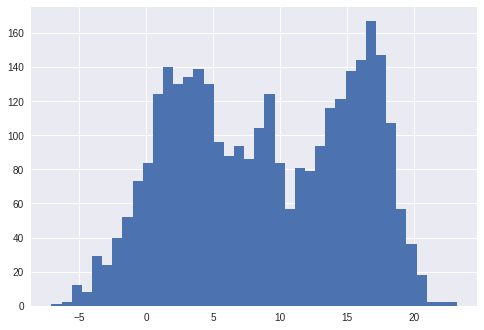

In [6]:
a=plt.hist(temp['avg'], 40)

## Temperatures moyennes annuelles

### Evolution

In [7]:
from sklearn import linear_model

In [8]:
temp_an = temp.groupby(['an'], as_index=False).mean()
temp_an = temp_an.drop(['mois'], axis=1)
temp_an.head()

,an,avg
0,1743,5.554000
1,1744,10.132875
2,1745,2.727000
3,1750,9.655455
4,1751,9.801375


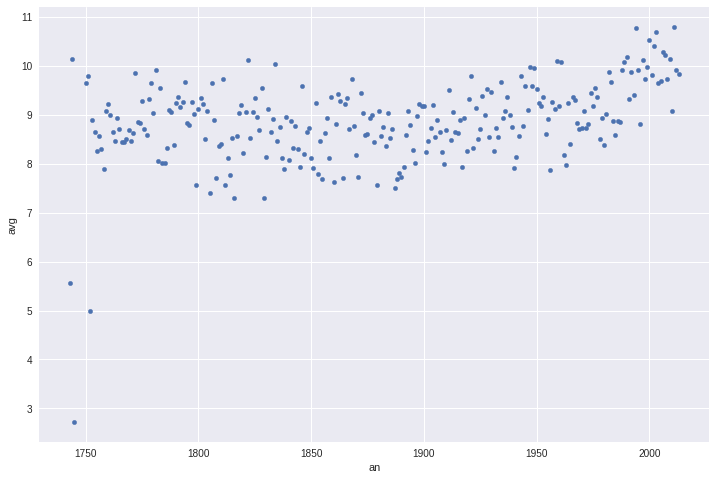

In [9]:
temp_an.plot(kind='scatter', x='an', y='avg', figsize=(12,8))

In [10]:
temp_an.insert(0, 'ones', 1)
temp_an.head()

,ones,an,avg
0,1,1743,5.554000
1,1,1744,10.132875
2,1,1745,2.727000
3,1,1750,9.655455
4,1,1751,9.801375


In [11]:
X = temp_an[['ones','an']]
X = np.matrix(X.values)

y = temp_an['avg']
y = y.values.reshape(267,1)
y = np.matrix(y)

theta = np.matrix( np.array([0, 0]) )

X.shape, y.shape, theta.shape

((267, 2), (267, 1), (1, 2))

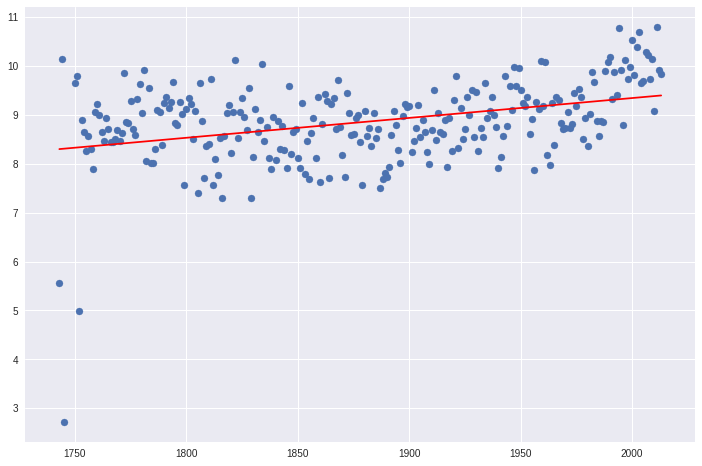

In [12]:
model = linear_model.LinearRegression()
model.fit(X, y)

years = np.array(X[:, 1].A1)

predicted_temp = model.predict(X).flatten()

fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(years, predicted_temp, 'r', label='Prediction')
ax.scatter(temp_an.an, temp_an.avg, label='Training data')

## Evolution à partir de 1950

In [13]:
temp_1950 = temp[temp['an'] > 1950]
temp_1950.head()

,avg,an,mois
2486,2.077,1951,1
2487,2.728,1951,2
2488,3.904,1951,3
2489,7.955,1951,4
2490,11.721,1951,5


In [14]:
temp_1950_an = temp_1950.groupby(['an'], as_index=False).mean()
temp_1950_an = temp_1950_an.drop(['mois'], axis=1)
temp_1950_an.head()

,an,avg
0,1951,9.238417
1,1952,9.172583
2,1953,9.365500
3,1954,8.610500
4,1955,8.922000


In [15]:
temp_1950_an.insert(0, 'ones', 1)

In [16]:
X = temp_1950_an[['ones', 'an']]
X = np.matrix( X.values )

y = temp_1950_an[['avg']]
y = y.values.reshape(63, 1)
y = np.matrix( y )

theta = np.matrix( np.array( [0, 0]))

X.shape, y.shape, theta.shape

((63, 2), (63, 1), (1, 2))

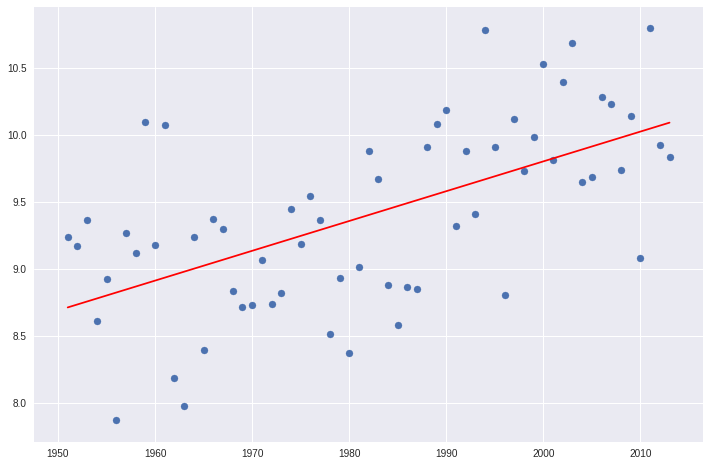

In [17]:
model = linear_model.LinearRegression()
model.fit(X, y)

years = np.array(X[:, 1].A1)

predicted_temp = model.predict(X).flatten()

fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(years, predicted_temp, 'r', label='Prediction')
ax.scatter(temp_1950_an.an, temp_1950_an.avg, label='Training data')

## Predictions pour 2050 et 2100

In [43]:
years = np.array([2010,2050,2100])
df = pd.DataFrame({'an':years})
df.insert(0,'ones',1)
Z = np.matrix(df)
predicted_temp = model.predict(Z).flatten() 
print('Temperature moyenne en 2010 : ', predicted_temp[0], '°C')
print('Temperature moyenne en 2050 : ', predicted_temp[1], '°C')
print('Temperature moyenne en 2100 : ', predicted_temp[2], '°C')

Temperature moyenne en 2010 :  10.0233472942 °C
Temperature moyenne en 2050 :  10.9135571477 °C
Temperature moyenne en 2100 :  12.0263194644 °C
